<a href="https://colab.research.google.com/github/Nacho-cedron82/DataSet-Coder-Insumos/blob/main/Proyecto_Final_Data_Science_I_Cedron_Ignacio_Javier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set(style="whitegrid")
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Inicial - Base CoderHouse - Subir.xlsx')
df.head()


Mounted at /content/drive


,Fecha,Id_Articulo,Id_Cliente,Cliente,Ventas Netas,ventas_final,Precio U,Cantidad,unidad,Iva,Alicuota IVa,_dto,_rec,Costo,Costo Unitario,Utilidad,Sub rubro,Rubro,Proveedor
0,2024-01-01,4396,41.0,CLEVM,42600.0,51546.00,426.0,100,426.0,8946.00,0.21,0.0,0,2500.0,25.0,40100.0,GERENCIA,GENERALES,ES
1,2024-01-01,4224,24.0,Cliente interior - 16,1030505.0,1246911.05,147215.0,7,147215.0,216406.05,0.21,0.0,0,332421.6,47488.8,698083.4,CPED,CARDIO,BBME
2,2024-01-01,4435,19.0,Cliente interior - 12,400270.0,484326.70,3079.0,130,3079.0,84056.70,0.21,0.0,0,190632.0,1466.4,209638.0,GERENCIA,JERINGAS,DMAR
3,2024-01-01,4758,5.0,Cliente interior - 5,156340.0,189171.40,15634.0,10,15634.0,32831.40,0.21,0.0,0,51303.0,5130.3,105037.0,T.E.T.,RESPIRATORIO,MED
4,2024-01-01,3231,45.0,ASCAL,1115700.0,1349997.00,37190.0,30,37190.0,234297.00,0.21,0.0,0,531288.0,17709.6,584412.0,AGUJAS,ANESTESIA,BBME


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           4569 non-null   datetime64[ns]
 1   Id_Articulo     4569 non-null   int64         
 2   Id_Cliente      4554 non-null   float64       
 3   Cliente         4538 non-null   object        
 4   Ventas Netas    4554 non-null   float64       
 5   ventas_final    4569 non-null   float64       
 6   Precio U        4487 non-null   float64       
 7   Cantidad        4569 non-null   int64         
 8   unidad          4569 non-null   float64       
 9   Iva             4569 non-null   float64       
 10  Alicuota IVa    4487 non-null   object        
 11  _dto            4569 non-null   float64       
 12  _rec            4569 non-null   int64         
 13  Costo           4569 non-null   float64       
 14  Costo Unitario  4569 non-null   float64       
 15  Util

<Axes: >

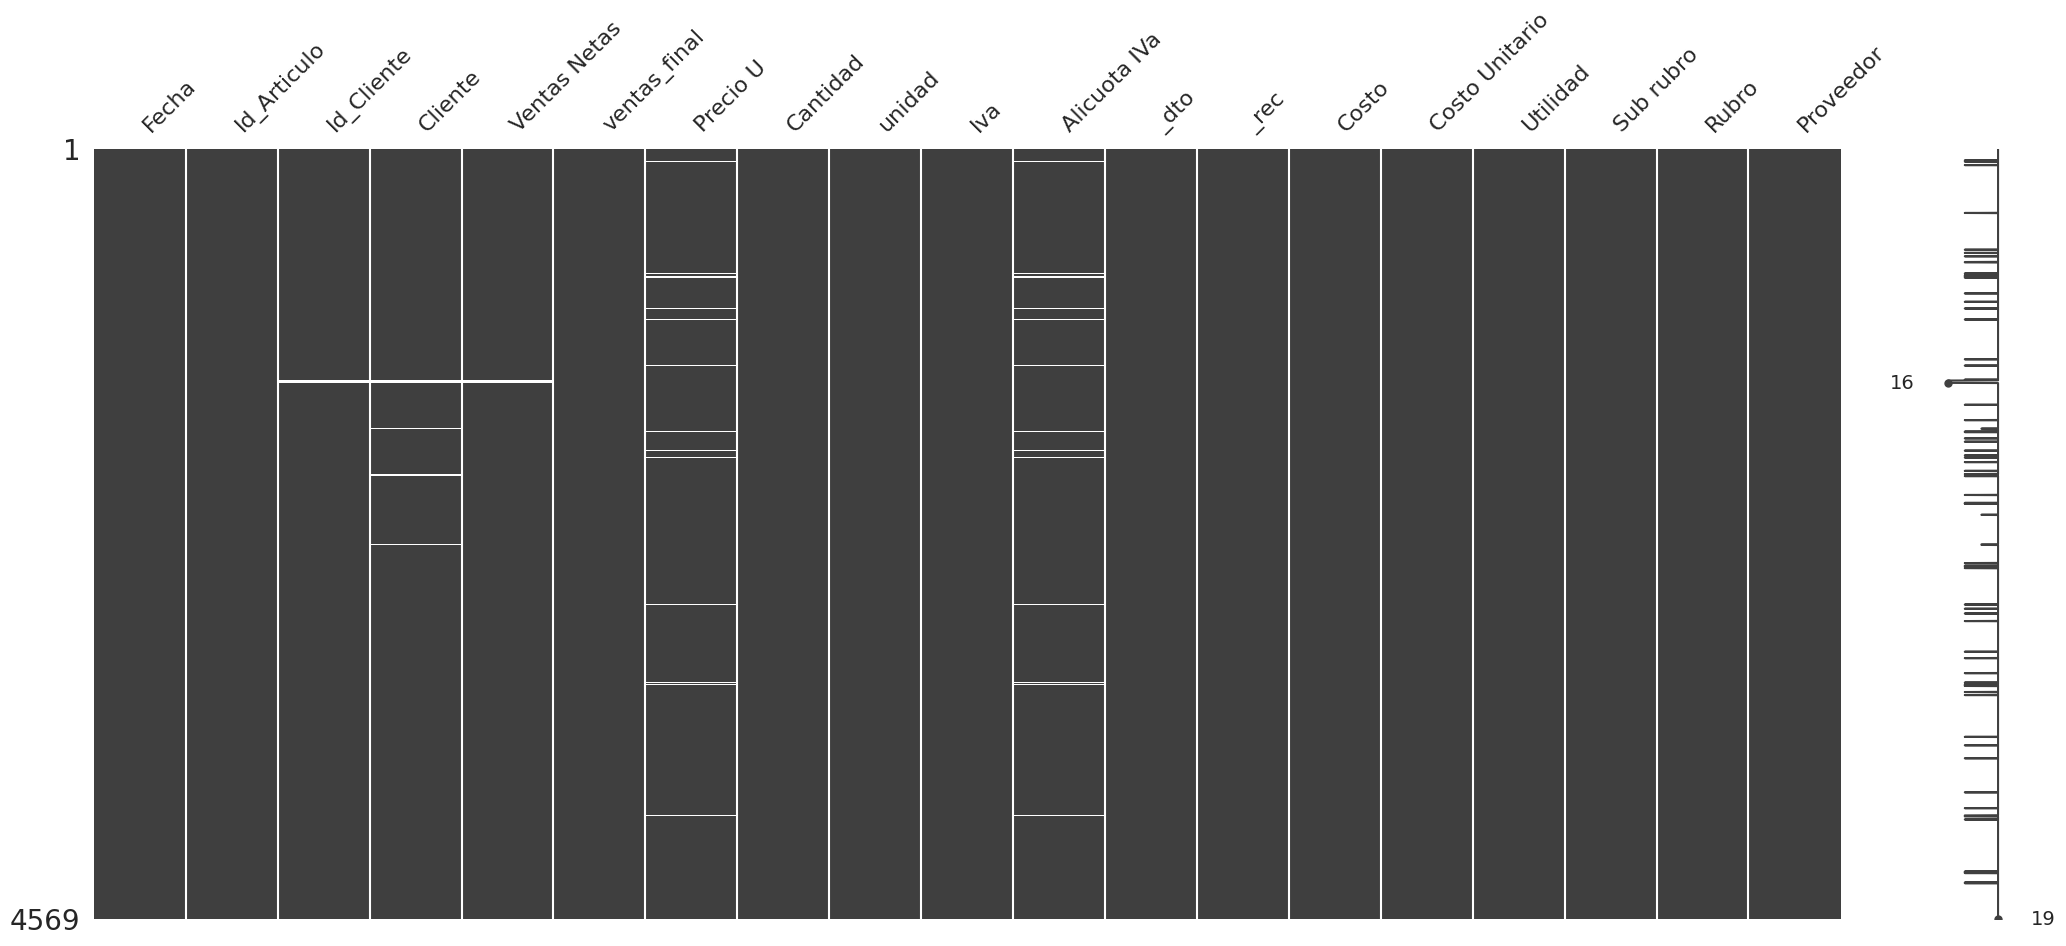

In [ ]:
!pip install missingno
%matplotlib inline
import missingno as msno
msno.matrix(df)

In [ ]:

df.describe()

,Fecha,Id_Articulo,Id_Cliente,Ventas Netas,ventas_final,Precio U,Cantidad,unidad,Iva,_dto,_rec,Costo,Costo Unitario,Utilidad
count,4569,4569.000000,4554.000000,4.554000e+03,4.569000e+03,4.487000e+03,4569.000000,4.569000e+03,4.569000e+03,4.569000e+03,4569.0,4.569000e+03,4.569000e+03,4.569000e+03
mean,2024-08-01 08:11:58.581746688,3810.057124,40.922925,9.799846e+05,1.189924e+06,8.701298e+04,35.778726,7.743043e+04,2.065965e+05,4.792834e+03,0.0,3.401114e+05,2.840318e+04,6.435191e+05
min,2024-01-01 00:00:00,2837.000000,0.000000,-2.657560e+06,-3.215648e+06,0.000000e+00,-120.000000,0.000000e+00,-5.580876e+05,-1.841761e+06,0.0,-9.335088e+05,-1.690415e+05,-1.871148e+06
25%,2024-04-01 00:00:00,2979.000000,7.000000,1.500050e+05,1.839200e+05,1.077900e+04,5.000000,1.049000e+04,3.184839e+04,0.000000e+00,0.0,5.889449e+04,3.237300e+03,8.198900e+04
50%,2024-08-01 00:00:00,3747.000000,23.000000,3.570420e+05,4.442636e+05,2.490200e+04,12.000000,2.392000e+04,7.648536e+04,0.000000e+00,0.0,1.342880e+05,8.654830e+03,2.121410e+05
75%,2024-11-01 00:00:00,4556.000000,55.750000,9.664000e+05,1.180900e+06,8.941900e+04,35.000000,8.042600e+04,2.054808e+05,0.000000e+00,0.0,3.447940e+05,2.838021e+04,6.240000e+05
max,2025-03-01 00:00:00,5082.000000,220.000000,5.324268e+07,6.442365e+07,6.160000e+06,4000.000000,6.160000e+06,1.118096e+07,3.037500e+06,0.0,2.892783e+07,4.821305e+06,3.946934e+07
std,NaN,769.651041,45.842989,2.179744e+06,2.633655e+06,2.131578e+05,112.304082,1.684654e+05,4.572442e+05,7.484184e+04,0.0,8.027486e+05,9.767431e+04,1.515208e+06


In [ ]:
df.isnull().sum()

,0
Fecha,0
Id_Articulo,0
Id_Cliente,15
Cliente,31
Ventas Netas,15
ventas_final,0
Precio U,82
Cantidad,0
unidad,0
Iva,0


In [ ]:
eliminar_nulos = ['Id_Cliente','Cliente','Ventas Netas','Precio U','Alicuota IVa']
df = df.dropna(subset=eliminar_nulos)
df.isnull().sum()

,0
Fecha,0
Id_Articulo,0
Id_Cliente,0
Cliente,0
Ventas Netas,0
ventas_final,0
Precio U,0
Cantidad,0
unidad,0
Iva,0


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
df_final = df.groupby(['Fecha', 'Rubro','Ventas Netas'])['Cantidad'].sum().reset_index()
print(df_final)




          Fecha         Rubro  Ventas Netas  Cantidad
0    2024-01-01     ANESTESIA     1115700.0        30
1    2024-01-01        CARDIO           0.0        10
2    2024-01-01        CARDIO       10964.0         2
3    2024-01-01        CARDIO       19188.0         3
4    2024-01-01        CARDIO       20710.0         2
...         ...           ...           ...       ...
3621 2025-03-01  RESPIRATORIO     3328185.0        15
3622 2025-03-01  RESPIRATORIO     4456820.0        20
3623 2025-03-01  RESPIRATORIO     4823520.0        60
3624 2025-03-01  RESPIRATORIO     4911000.0        20
3625 2025-03-01  RESPIRATORIO     5907060.0        30

[3626 rows x 4 columns]


<ipython-input-7-26cff8e6de6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')


In [ ]:
df_final['Año'] = df_final['Fecha'].dt.year
df_final['MesNum'] = df_final['Fecha'].dt.month
df_final['Mes'] = df_final['Fecha'].dt.strftime('%B')

In [ ]:
mes_map = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre', 'December': 'Diciembre'
}

In [ ]:
df_final['Mes'] = df_final['Mes'].map(mes_map)


In [ ]:
print(df_final)

          Fecha         Rubro  Ventas Netas  Cantidad   Año  MesNum    Mes
0    2024-01-01     ANESTESIA     1115700.0        30  2024       1  Enero
1    2024-01-01        CARDIO           0.0        10  2024       1  Enero
2    2024-01-01        CARDIO       10964.0         2  2024       1  Enero
3    2024-01-01        CARDIO       19188.0         3  2024       1  Enero
4    2024-01-01        CARDIO       20710.0         2  2024       1  Enero
...         ...           ...           ...       ...   ...     ...    ...
3621 2025-03-01  RESPIRATORIO     3328185.0        15  2025       3  Marzo
3622 2025-03-01  RESPIRATORIO     4456820.0        20  2025       3  Marzo
3623 2025-03-01  RESPIRATORIO     4823520.0        60  2025       3  Marzo
3624 2025-03-01  RESPIRATORIO     4911000.0        20  2025       3  Marzo
3625 2025-03-01  RESPIRATORIO     5907060.0        30  2025       3  Marzo

[3626 rows x 7 columns]


In [ ]:
Cant_rubros = df['Rubro'].nunique()
print(f"Cantidad de rubos: {Cant_rubros}")

Cantidad de rubos: 14


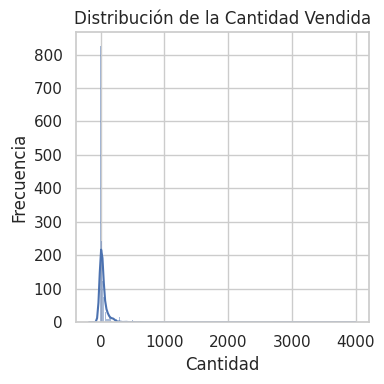

In [ ]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df_final, x='Cantidad', kde=True)
plt.title('Distribución de la Cantidad Vendida')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


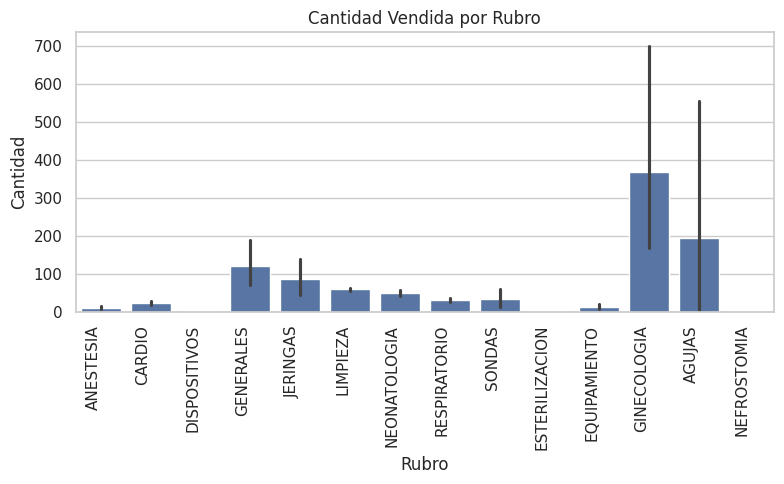

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_final, x='Rubro', y='Cantidad')
plt.title('Cantidad Vendida por Rubro')
plt.xlabel('Rubro')
plt.ylabel('Cantidad')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-15-75a77ee98c46>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_mensuales, x='Mes', y='Cantidad', palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Enero'),
  Text(1, 0, 'Febrero'),
  Text(2, 0, 'Marzo'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Mayo'),
  Text(5, 0, 'Junio'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Septiembre'),
  Text(9, 0, 'Octubre'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Diciembre')])

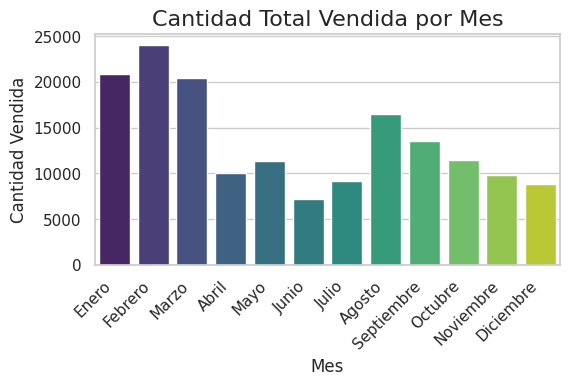

In [ ]:
ventas_mensuales = df_final.groupby(['Mes'])['Cantidad'].sum().reset_index()
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ventas_mensuales['Mes'] = pd.Categorical(ventas_mensuales['Mes'], categories=orden_meses, ordered=True)
ventas_mensuales = ventas_mensuales.sort_values('Mes')
plt.figure(figsize=(6, 3))
sns.barplot(data=ventas_mensuales, x='Mes', y='Cantidad', palette='viridis')
plt.title('Cantidad Total Vendida por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right')


Modelo de prediccion de cantidad vendida a fin de poder determinar la compra optima de insumos para el abastesimiento de la demanda

In [ ]:
X = df_final[['Rubro', 'Mes']]
y = df_final['Cantidad']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.columns))
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

Evaluar

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Absoluto Medio (MAE): 44.04613853839387
Error Cuadrático Medio (MSE): 15391.71267589768
Raíz del Error Cuadrático Medio (RMSE): 124.06334138615516
Coeficiente de Determinación (R²): -0.01456522112625036


In [ ]:
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print("\nPrimeras 5 predicciones:")
print(resultados.head())


Primeras 5 predicciones:
      Real  Predicción
602     24   56.999449
1826    24   78.627400
2404    10   47.304263
3177     5   35.578387
2507    20   14.933033
